<h1> AWS and Machine Learning </h1>

> Data Cleaning - Strategies for Missing Values - Advanced Imputation Strategies

GitHub Link: https://github.com/data-analytics-professionals

In [1]:
# Set the Jyputer Notebook, width: 100% 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

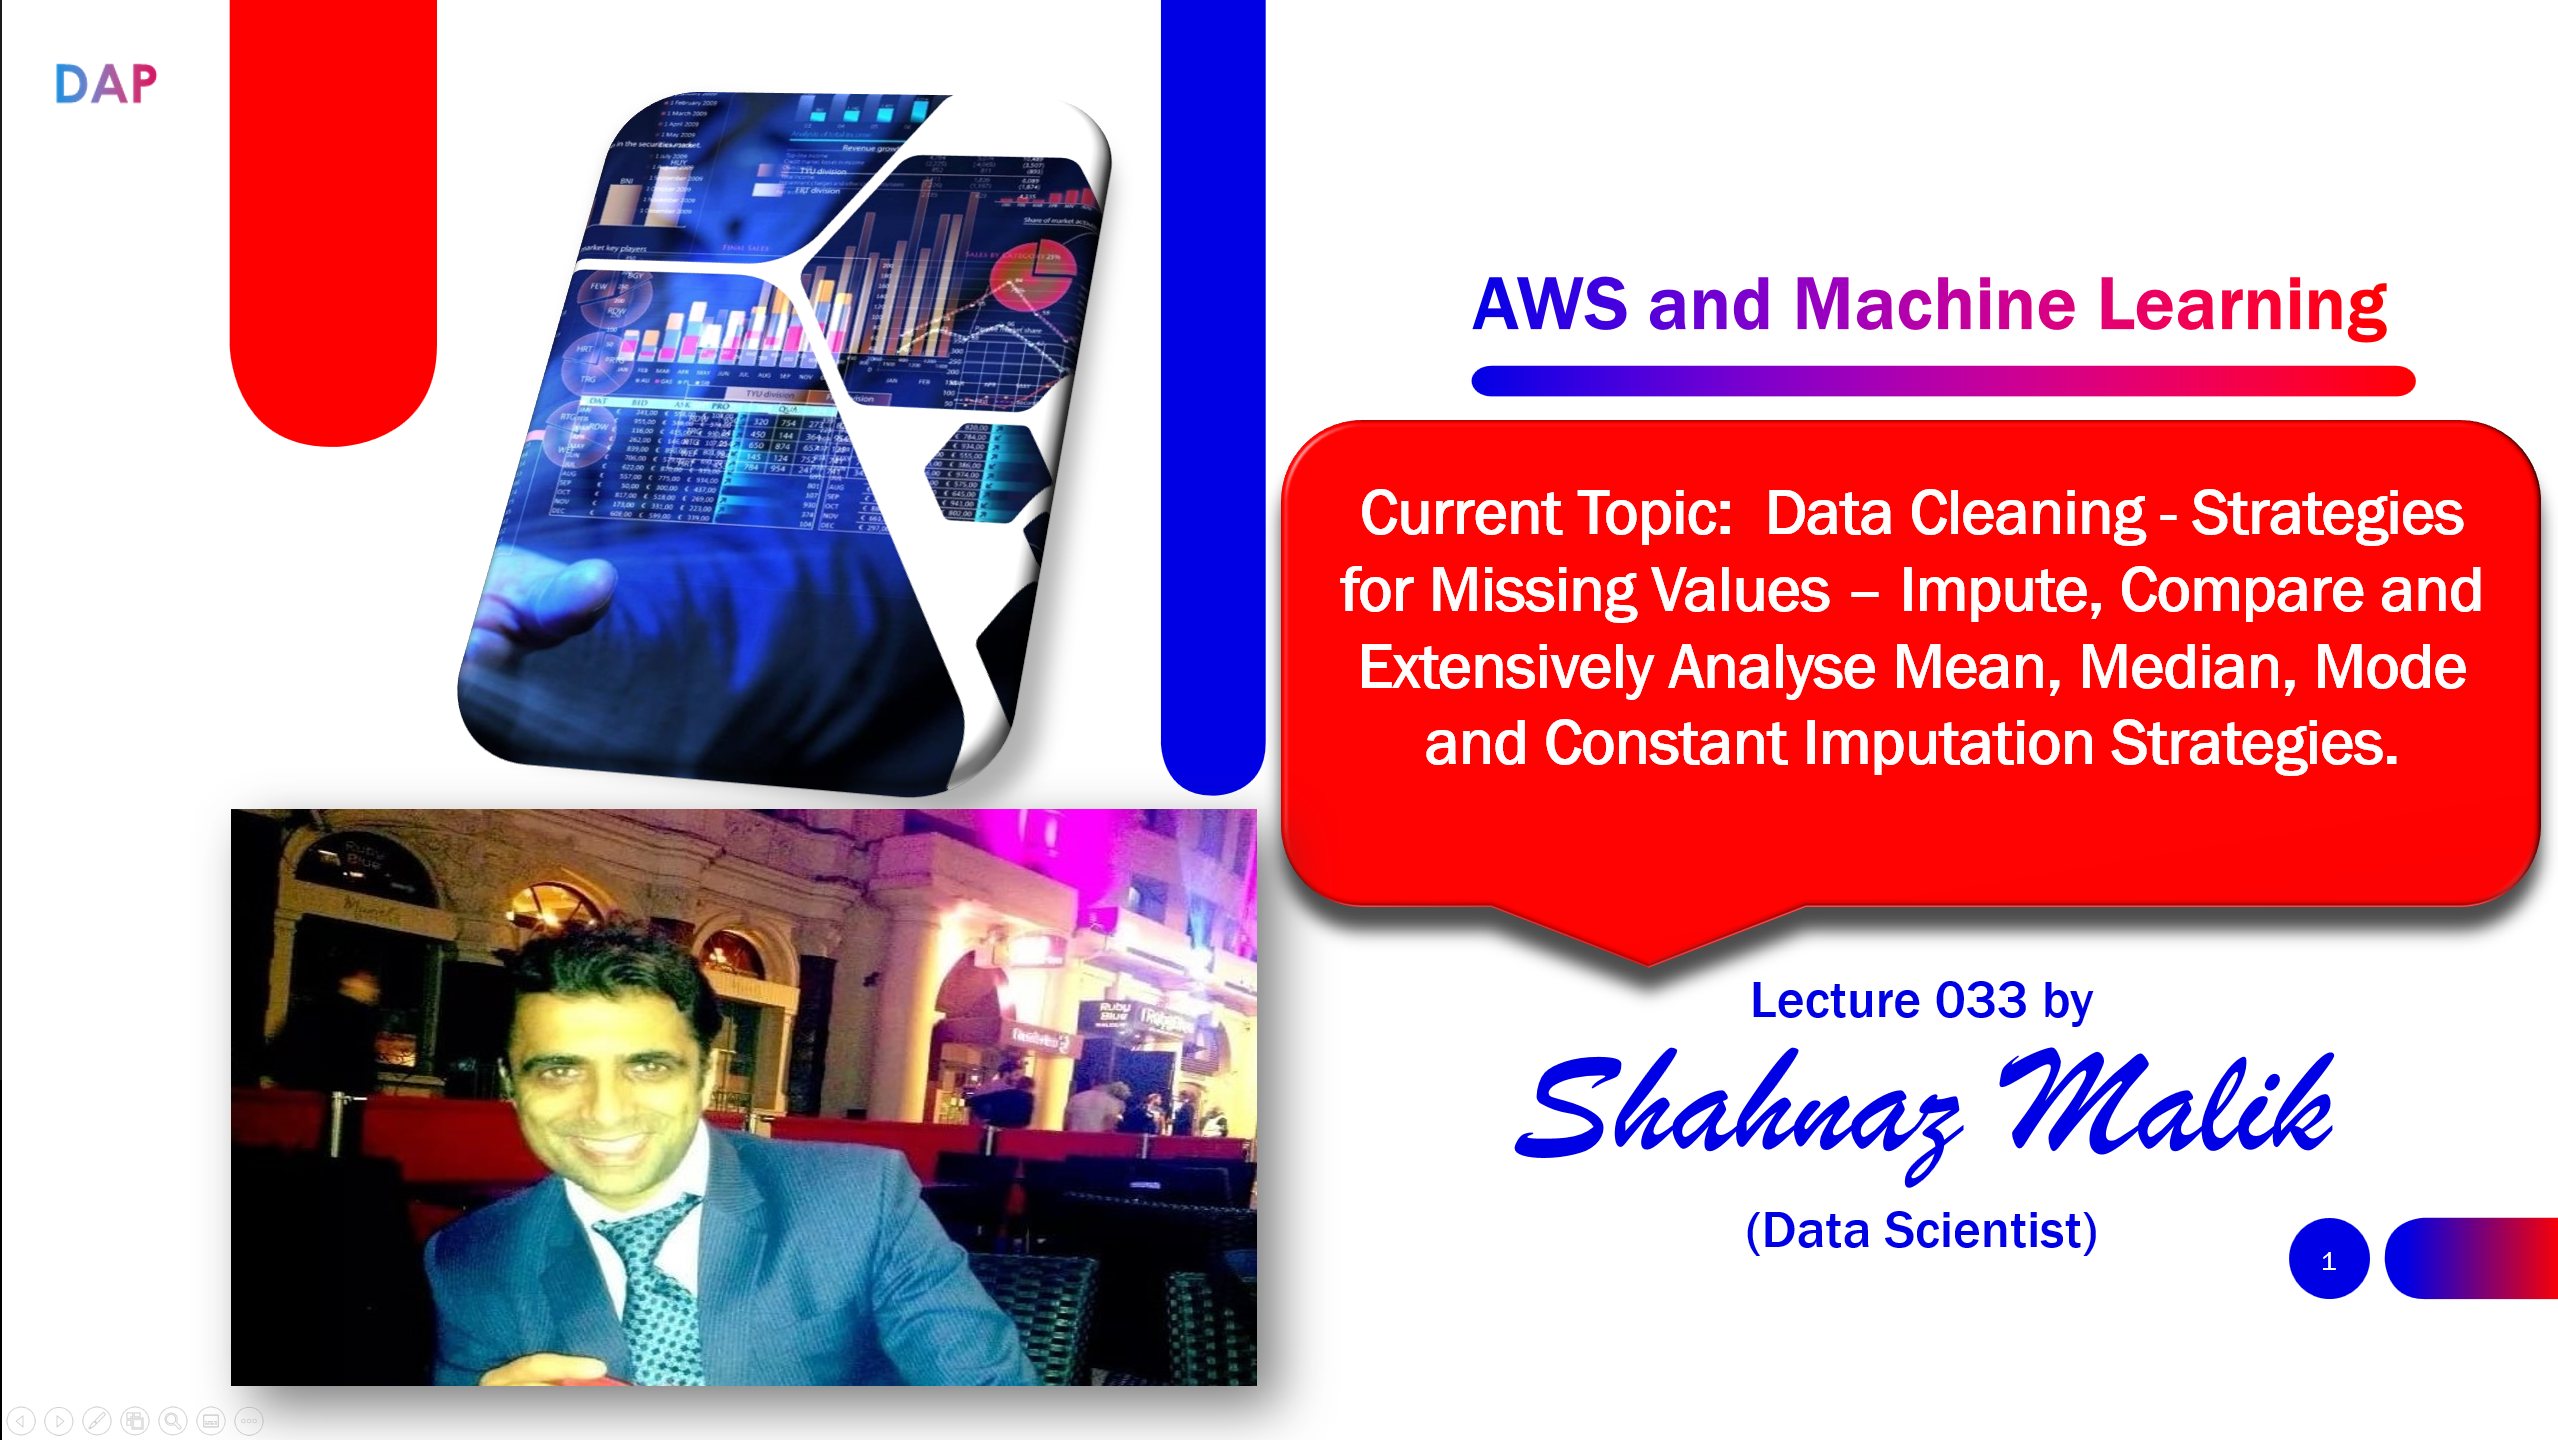

In [2]:
from IPython.display import Image
cover = Image(filename="../project_diabetes/photos/Strategies for Missing Values – Impute, Compare and Extensively Analyse.png")
display(cover)

> Data Acquisition 

In [3]:
# Load the libraries (numpy, pandas) for data analysis and data wrangling
import numpy as np
import pandas as pd

# Read the dataset 'diabetes.csv'
df = pd.read_csv('data/pima_indians_diabetes.xls')

In [4]:
# Sample function return a random sample of n items from an axis of object.
df.sample(n=10)

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
160,4.0,151.0,90.0,38.0,NaN,29.7,0.294,36,0.0
314,7.0,109.0,80.0,31.0,NaN,35.9,1.127,43,1.0
446,1.0,100.0,72.0,12.0,70.0,25.3,0.658,28,0.0
258,1.0,193.0,50.0,16.0,375.0,25.9,0.655,24,0.0
754,8.0,154.0,78.0,32.0,NaN,32.4,0.443,45,1.0
479,4.0,132.0,86.0,31.0,NaN,28.0,0.419,63,0.0
694,2.0,90.0,60.0,NaN,NaN,23.5,0.191,25,0.0
432,1.0,80.0,74.0,11.0,60.0,30.0,0.527,22,0.0
230,4.0,142.0,86.0,NaN,NaN,44.0,0.645,22,1.0
579,2.0,197.0,70.0,99.0,NaN,34.7,0.575,62,1.0


In [5]:
# info function prints a concise summary of a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnant             768 non-null float64
Glucose              763 non-null float64
Diastolic_BP         733 non-null float64
Skin_Fold            541 non-null float64
Serum_Insulin        394 non-null float64
BMI                  757 non-null float64
Diabetes_Pedigree    768 non-null float64
Age                  768 non-null int64
Class                768 non-null float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [6]:
# Print the description of the data
df.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> Analyzing Missingness Percentage

In [7]:
# Create a nullity DataFrame df_nullity
df_nullity = df.isnull()

In [8]:
# print nullity df_nullity
df_nullity.head(n=10)

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,True,True,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,True,False,False,False


In [9]:
# Calculate total of missing values
print('Total Missing Values:\n', df_nullity.sum())

Total Missing Values:
 Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


In [10]:
# Calculate percentage of missing values
df_nullity_percent =  df_nullity.mean() * 100
print('Percentage of Missing Values:\n', df_nullity_percent)

Percentage of Missing Values:
 Pregnant              0.000000
Glucose               0.651042
Diastolic_BP          4.557292
Skin_Fold            29.557292
Serum_Insulin        48.697917
BMI                   1.432292
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64


> Visualize Missingness

In [11]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

print(plt.style.available)


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [12]:
# Set Solarize_Light2 style
plt.style.use('Solarize_Light2')

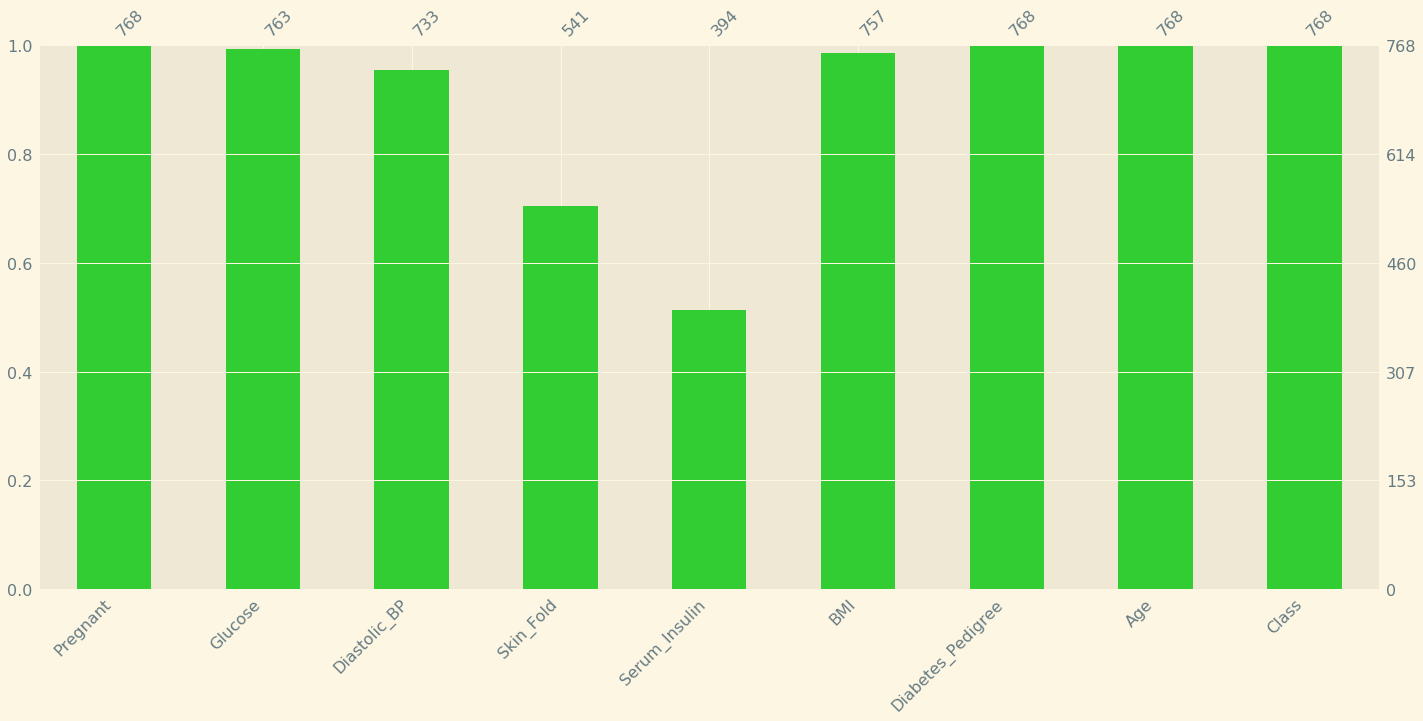

In [13]:
# Plot amount of missingness in the DataFrame
msno.bar(
    df,
    figsize=(24, 10),
    fontsize=16,
    labels=None,
    log=False,
    color='limegreen',
    inline=False,
    filter=None,
    n=0,
    p=0,
    sort=None,
    ax=None
)

plt.show()


> Plot the nullity matrix of df

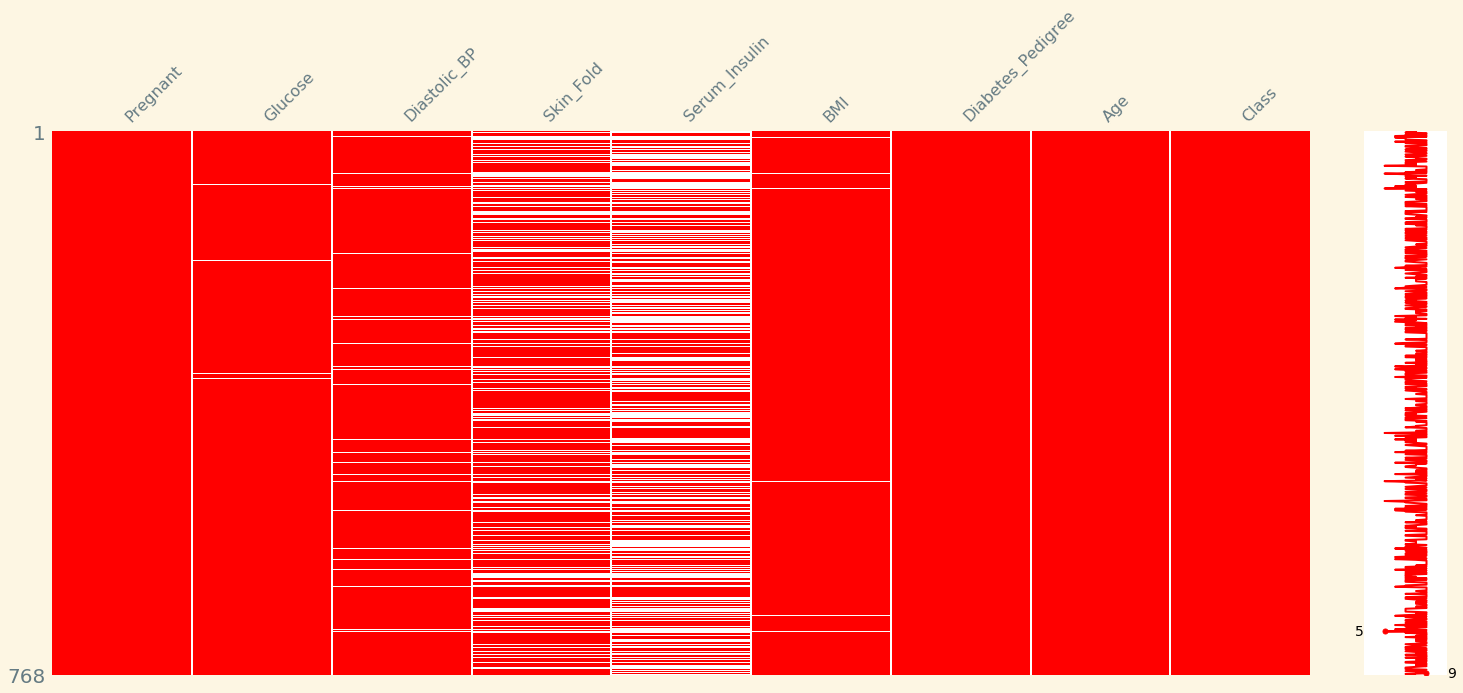

In [14]:
# Plot nullity matrix of df
msno.matrix(
    df=df,
    filter=None,
    n=0,
    p=0,
    sort=None,
    figsize=(25, 10),
    width_ratios=(15, 1),
    color=(1,0,0),
    fontsize=16,
    labels=None,
    sparkline=True,
    inline=False,
    freq=None,
    ax=None,
)

plt.show()


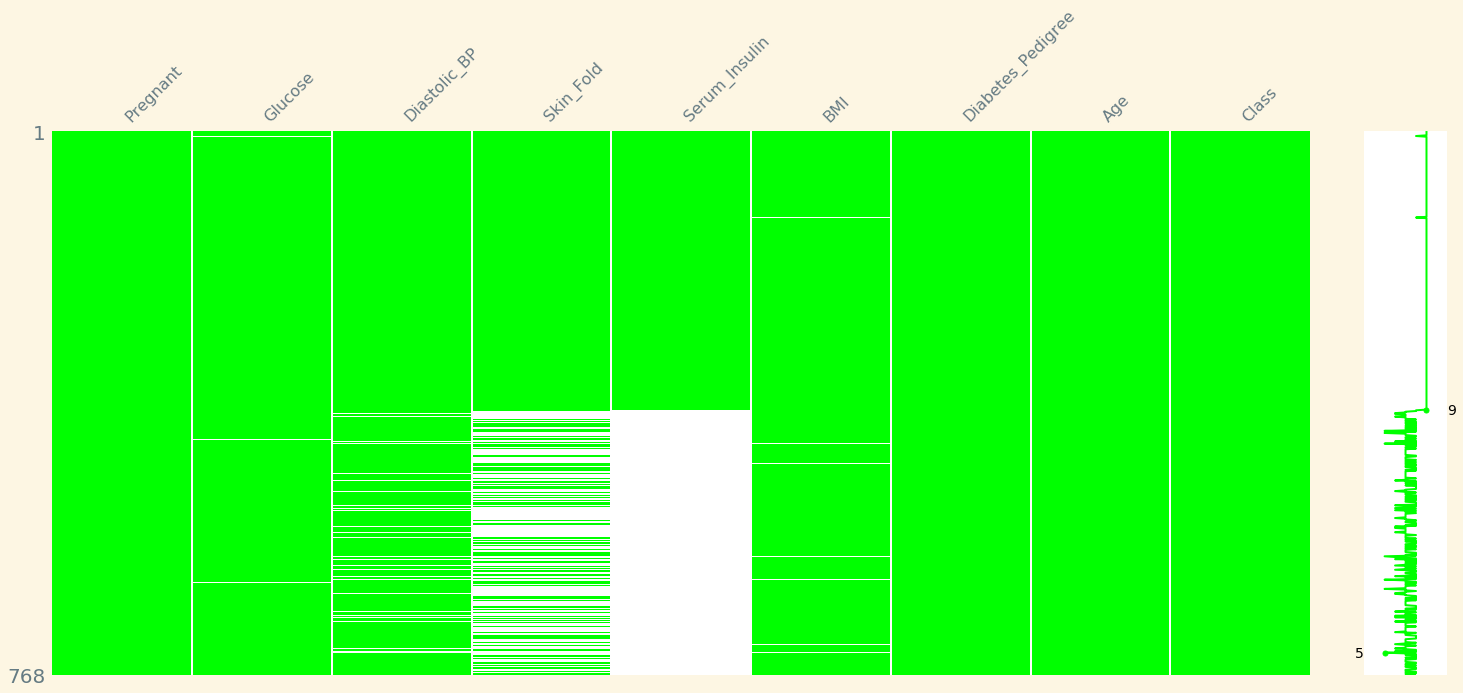

In [15]:
# Sort diabetes dataframe df on 'Serum_Insulin'
sorted_values = df.sort_values(by=['Serum_Insulin'])

# Visualize the missingness summary of sorted
msno.matrix(
    sorted_values,
    filter=None,
    n=0,
    p=0,
    sort=None,
    figsize=(25, 10),
    width_ratios=(15, 1),
    color=(0,1,0),
    fontsize=16,
    labels=None,
    sparkline=True,
    inline=False,
    freq=None,
    ax=None,
)

plt.show()

> Correlations Between Missing Data (Missingness)

> Remember we could find correlations between missing data and it helps us to gain a deeper understanding of the type of missing data.
> It also provides suitable ways in which the missing values can be addressed.


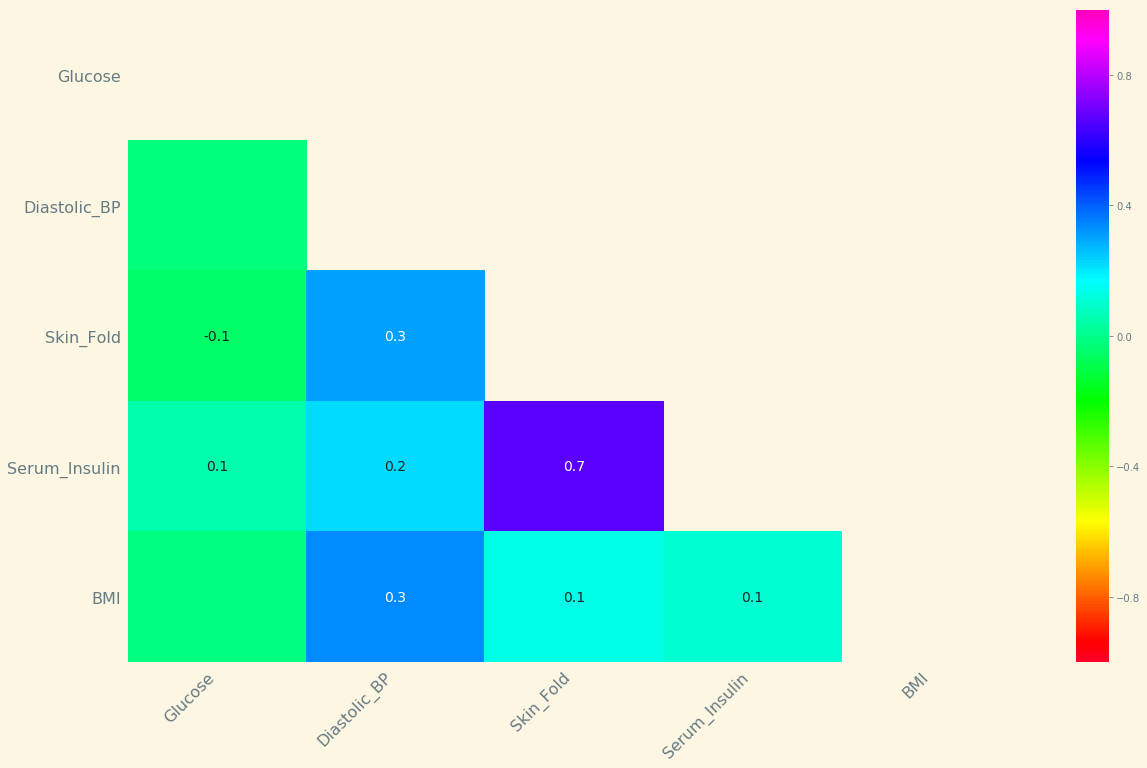

In [16]:
# Plot missingness heatmap of diabetes DataFrame df
msno.heatmap(
    df,
    inline=False,
    filter=None,
    n=0,
    p=0,
    sort=None,
    figsize=(20, 12),
    fontsize=16,
    labels=True,
    cmap='gist_rainbow',
    vmin=-1,
    vmax=1,
    cbar=True,
    ax=None,
)

# Show plot
plt.show()

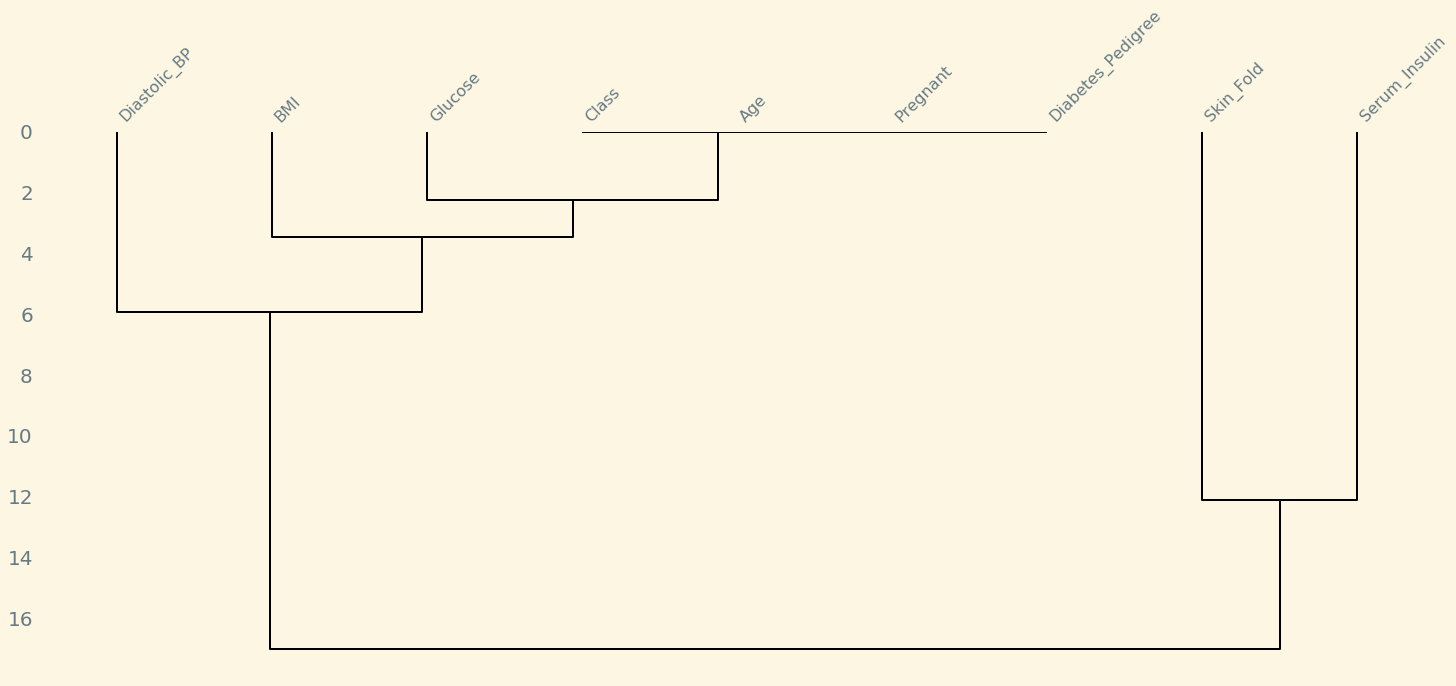

In [17]:
# Plot missingness dendrogram of diabetes DataFrame df
msno.dendrogram(
    df,
    method='average',
    filter=None,
    n=0,
    p=0,
    orientation=None,
    figsize=None,
    fontsize=16,
    inline=False,
    ax=None,
)

# Show plot
plt.show()

> More topics: 
    Writing useful functions

In [18]:
import numpy as np
from numpy.random import rand

# Write a function that automates creating dummy values for missing data
def fill_dummy_values(df, scaling_factor=0.075):
    df_dummy = df.copy(deep=True)
    for col_name in df_dummy:
        
        # Get column
        col = df_dummy[col_name]
        col_null = col.isnull()  
        # Calculate number of missing values in column 
        num_nulls = col_null.sum()
        # Calculate column range
        col_range = col.max() - col.min()
        # Shift dummy values to -2 and -1 , Remember rand generates values between 0 and 1
        dummy_values = (rand(num_nulls) - 2) 
        # Scale dummy variables by scaling_factor and shift them towards col.min
        dummy_values = dummy_values * scaling_factor * col_range + col.min()
        
        # Return dummy values
        col[col_null] = dummy_values
    return df_dummy

> Generate scatter plot with missingness

C:\DataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Shahnaz\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


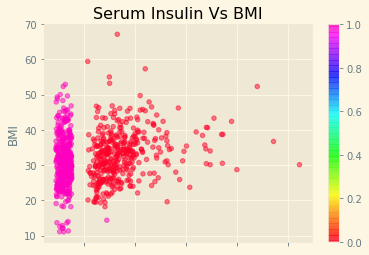

In [19]:
# Fill dummy values in diabetes_dummy
diabetes_dummy = fill_dummy_values(df)

# Sum the nullity of Serum_Insulin and BMI (for coloring)
nullity_Serum_Insulin_BMI = df.Serum_Insulin.isnull() + df.BMI.isnull()

# Create a scatter plot of Serum_Insulin and BMI 
diabetes_dummy.plot(
    x='Serum_Insulin', 
    y='BMI', 
    kind='scatter', 
    alpha=0.5,
    # Set color to nullity of BMI and Skin_Fold
    c=nullity_Serum_Insulin_BMI, 
    colormap='gist_rainbow',
    title='Serum Insulin Vs BMI'    
)

plt.show()

> Excellent! Now from above plot, lets make sure that we take a close look at how the missing values of Serum Insulin and BMI interact with eachther. We dont see any specfic corelation between these two variables that is of missingness of Skin_Insulin and BMI.

> Let's find interaction between Serum_Insulin and BMI

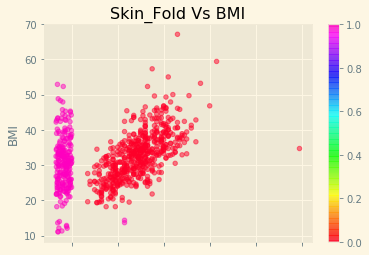

In [20]:
# Sum the nullity of Skin_Fold and BMI
nullity_Skin_Fold_BMI = df.Skin_Fold.isnull() + df.BMI.isnull()

# Create a scatter plot of Skin Fold and BMI 
diabetes_dummy.plot(
    x='Skin_Fold', 
    y='BMI', 
    kind='scatter', 
    alpha=0.5,                
    
    # Set color to nullity of BMI and Skin_Fold
    c=nullity_Skin_Fold_BMI,
    colormap='gist_rainbow',
    
    # Set title
    title='Skin_Fold Vs BMI'
)

plt.show()

Remember: We have already discussed and performed deletions tasks
    Just to recall deletions are of two types 
    1. Pairwise deletion
    2. Listwise deletion (Complete Case Analysis)
    Note: used when the values are MCAR

"""

Listwise and pairwise deletion are the most common techniques to handling missing data.  
It is important to understand that in the vast majority of cases, an important assumption to using either of these techniques is that our data is missing completely 
at random (MCAR).

In other words, the analysts or researchers needs to support that the probability of missing data on their dependent variable is unrelated to other independent variables 
as well as the dependent variable itself.

"""

> Mean Imputations

In [21]:
# Make a copy of diabetes
diabetes_mean = df.copy(deep=True)

from sklearn.impute import SimpleImputer

# Create mean imputer object
mean_imputer = SimpleImputer(strategy='mean')

# Impute mean values in the DataFrame diabetes_mean
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

> Median Imputations

In [22]:
# Make a copy of diabetes
diabetes_median = df.copy(deep=True)

# Create median imputer object
median_imputer = SimpleImputer(strategy='median')

# Impute median values in the DataFrame diabetes_median
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)

> Mode Imputation


In [23]:
# Make a copy of diabetes
diabetes_mode = df.copy(deep=True)

# Create mode imputer object
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute mode values in the DataFrame diabetes_mode
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)

>Imputing a constant

In [24]:
# Make a copy of diabetes
diabetes_constant = df.copy(deep=True)

# Create comstant imputer object
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Impute missing values to 0 in diabetes_constant
diabetes_constant.iloc[:, :] = constant_imputer.fit_transform(diabetes_constant)

>Scatterplot of imputation

C:\Users\Shahnaz\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


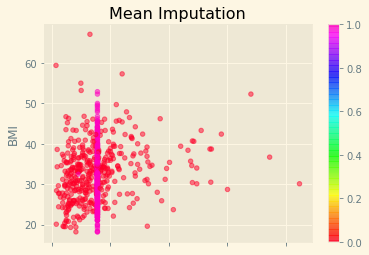

In [25]:
# Sum the nullity of Serum_Insulin and BMI (for coloring)
nullity = df['Serum_Insulin'].isnull() + df['BMI'].isnull()

# Create a scatter plot of Serum_Insulin and BMI from diabetes_mean 
diabetes_mean.plot(
    x='Serum_Insulin', 
    y='BMI', 
    kind='scatter', 
    alpha=0.5,
    c=nullity, 
    cmap='gist_rainbow',
    title='Mean Imputation'
)

plt.show()

>Comparision of Different Imputation Strategies and their Visual Analysis 

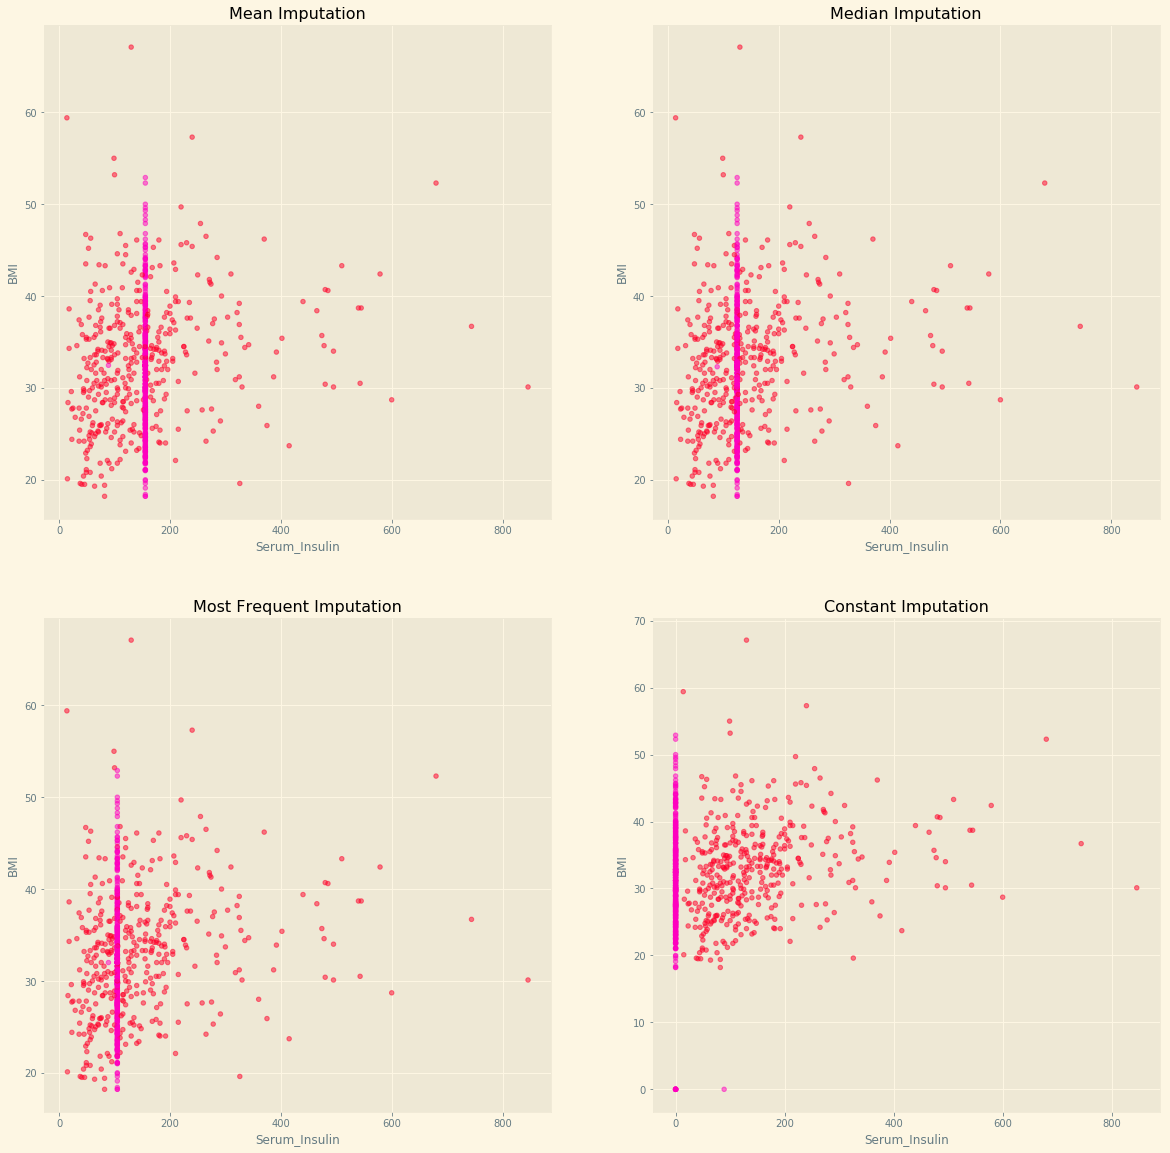

In [26]:
# Set nrows and ncols to 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

nullity = df['Serum_Insulin'].isnull() + df['BMI'].isnull()

# Create a dictionary of imputations
imputations = {
    'Mean Imputation': diabetes_mean,
    'Median Imputation': diabetes_median,
    'Most Frequent Imputation': diabetes_mode,
    'Constant Imputation' : diabetes_constant    
}

# Loop over flattened axes and imputations
for ax, df_key in zip(axes.flatten(), imputations):
    # Select and also set the title for a DataFrame
    imputations[df_key].plot(
        x='Serum_Insulin',
        y='BMI',
        kind='scatter',
        alpha=0.5,
        c=nullity,
        cmap='gist_rainbow',
        ax=ax,
        colorbar=False,
        title=df_key
    )
    

> Summary:
> Clear correlation between non-missing plotted features that are missed in our all imputation strategies and this creates a bias.
> imputation strategies do preserve their basic statistical properties but don’t account for their correlations.
   

> To deal with this real world problem we need more robust and advanced imputation strategies. Lets use KNN from francyimpute package.

> funcyimpute: A variety of matrix completion and imputation algorithms implemented in Python 3.6.
> Algorithms
> SimpleFill: Replaces missing entries with the mean or median of each column.

> KNN: Nearest neighbor imputations which weights samples using the mean squared difference on features for which two rows both have observed data.

> SoftImpute: Matrix completion by iterative soft thresholding of SVD decompositions. Inspired by the softImpute package for R, which is based on Spectral Regularization Algorithms for Learning Large Incomplete Matrices by Mazumder et. al.

> IterativeImputer: A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. A stub that links to scikit-learn's IterativeImputer.

> IterativeSVD: Matrix completion by iterative low-rank SVD decomposition. Should be similar to SVDimpute from Missing value estimation methods for DNA microarrays by Troyanskaya et. al.

> MatrixFactorization: Direct factorization of the incomplete matrix into low-rank U and V, with an L1 sparsity penalty on the elements of U and an L2 penalty on the elements of V. Solved by gradient descent.

> NuclearNormMinimization: Simple implementation of Exact Matrix Completion via Convex Optimization by Emmanuel Candes and Benjamin Recht using cvxpy. Too slow for large matrices.

> BiScaler: Iterative estimation of row/column means and standard deviations to get doubly normalized matrix. Not guaranteed to converge but works well in practice. Taken from Matrix Completion and Low-Rank SVD via Fast Alternating Least Squares.

>> from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler

<h2> KNN imputation </h2>

> Datasets always have features which are correlated. 
> Hence, it becomes important to consider them as a factor for imputing missing values. 
> Machine learning models use features in the DataFrame to find correlations and patterns and predict a selected feature.

> One of the simplest and most efficient models is the K Nearest Neighbors. 
> It finds 'K' points most similar to the existing data points to impute missing values.

In [31]:
# Import KNN from fancyimpute
from fancyimpute import KNN

# Copy diabetes to diabetes_knn_imputed
df_knn_imputed = df.copy(deep=True)

# Initialize KNN
knn_imputer = KNN()

# Impute using fit_tranform on diabetes_knn_imputed
df_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(df_knn_imputed)

Imputing row 1/768 with 1 missing, elapsed time: 0.141
Imputing row 101/768 with 2 missing, elapsed time: 0.145
Imputing row 201/768 with 1 missing, elapsed time: 0.149
Imputing row 301/768 with 3 missing, elapsed time: 0.153
Imputing row 401/768 with 2 missing, elapsed time: 0.156
Imputing row 501/768 with 0 missing, elapsed time: 0.160
Imputing row 601/768 with 1 missing, elapsed time: 0.164
Imputing row 701/768 with 0 missing, elapsed time: 0.168


<h2> MICE (Mutiple Imputation by Chained Equations) </h2>

> MICE: is a very robust and complex model for imputing missing values.
> It imputes using multiple regressions over the data and takes an average value for filling in the missing feature for a data point.
> it is known as IterativeImputer in the fancyimpute package as it performs multiple imputations on the data.

In [30]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
df_mice = df.copy(deep=True)
df_mice.iloc[:, :] = MICE_imputer.fit_transform(df_mice)


In [32]:
# Import IterativeImputer from fancyimpute
from fancyimpute import IterativeImputer

# Copy diabetes to diabetes_mice_imputed
df_mice_imputed = df.copy(deep=True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Impute using fit_transform on diabetes
df_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(df_mice_imputed)

>> Remember, KNN finds most similar points for imputing while MICE performs multiple regression for imputing 